In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195
9,female,group B,high school,free/reduced,none,38,60,50,148


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
dtype: int64

There are no missing values in the dataset

In [5]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [7]:
df.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
total score                    194
dtype: int64

In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [9]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

print(f'We have {len(numeric_feature)} numeric features. {[numeric_feature]}')
print(f'We have {len(categorical_feature)} numeric features. {[categorical_feature]}')

We have 4 numeric features. [['math score', 'reading score', 'writing score', 'total score']]
We have 5 numeric features. [['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]


In [10]:
df['Average']  =df['total score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Data Visualization


<Axes: xlabel='Average', ylabel='Count'>

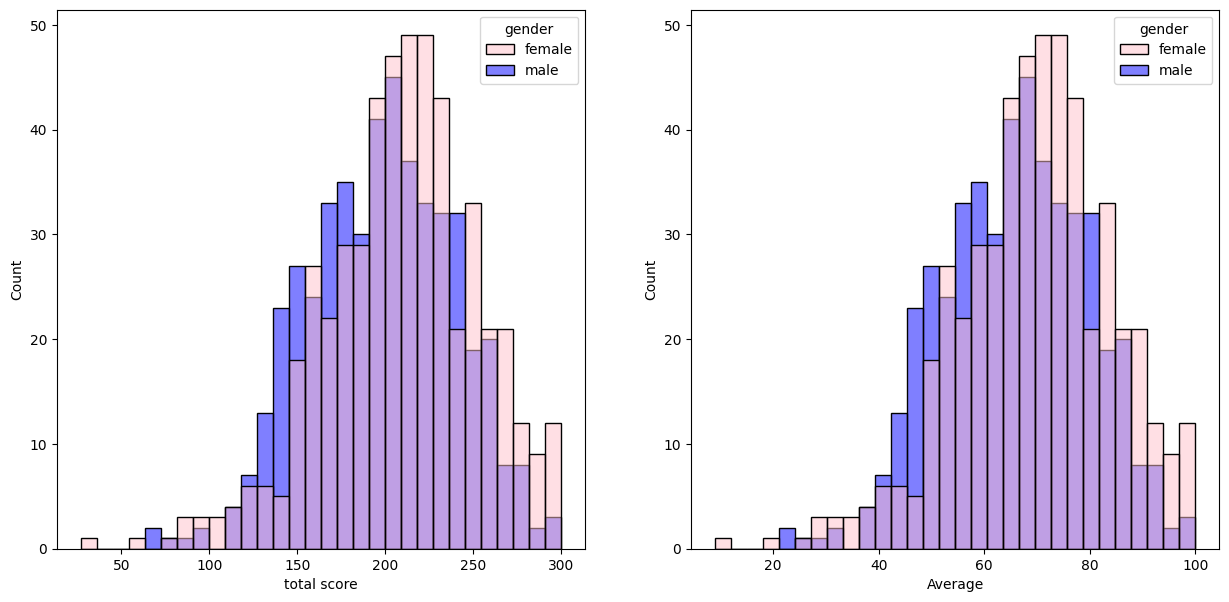

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
gender_colors = {'female':'pink', 'male':'blue'}
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, hue='gender', palette=gender_colors)
plt.subplot(122)
sns.histplot(data=df, x='Average', bins=30, hue='gender', palette=gender_colors)

Insights

The above graphs show that female students tend to score better than male students.


Text(0.5, 1.0, 'Female')

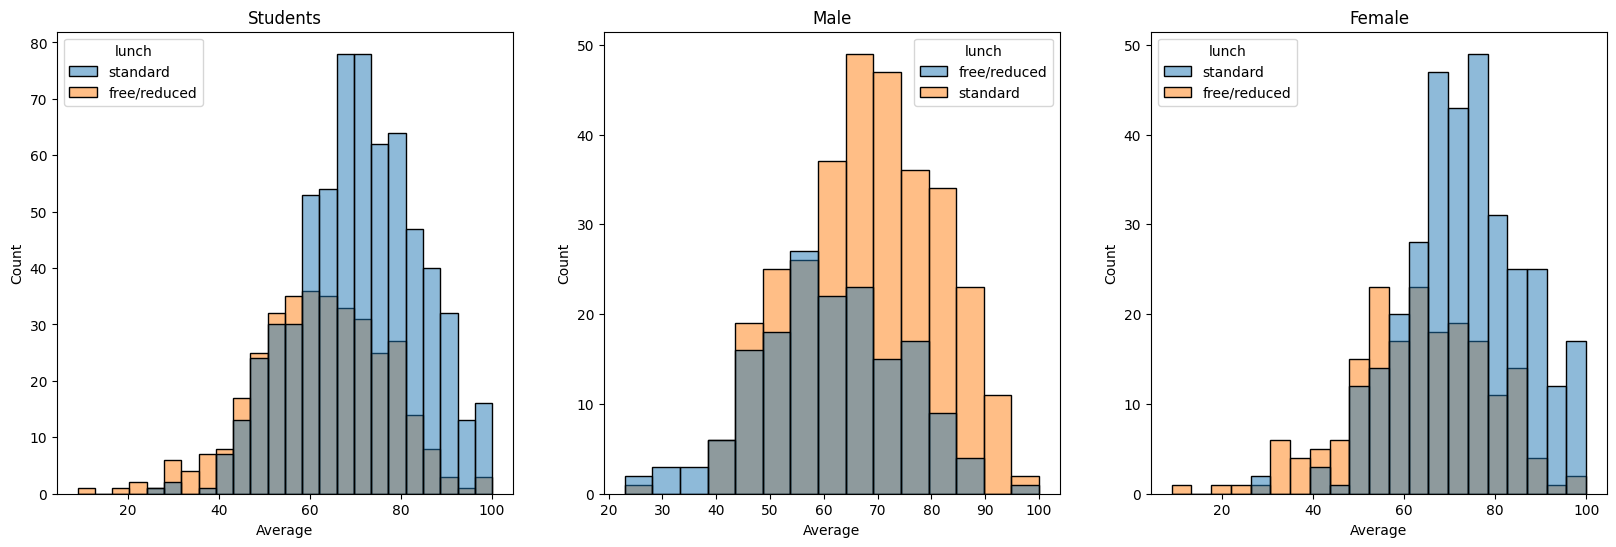

In [12]:
fig, axs = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df, x='Average', hue='lunch', ax=axs[0])
axs[0].set_title('Students')

sns.histplot(data=df[df.gender=='male'], x='Average', hue='lunch', ax=axs[1])
axs[1].set_title('Male')

sns.histplot(data=df[df.gender=='female'], x='Average', hue='lunch', ax=axs[2])
axs[2].set_title('Female')

Insights

Standard lunch helps students in scoring better marks regardless of the gender.


<Axes: xlabel='Average', ylabel='Count'>

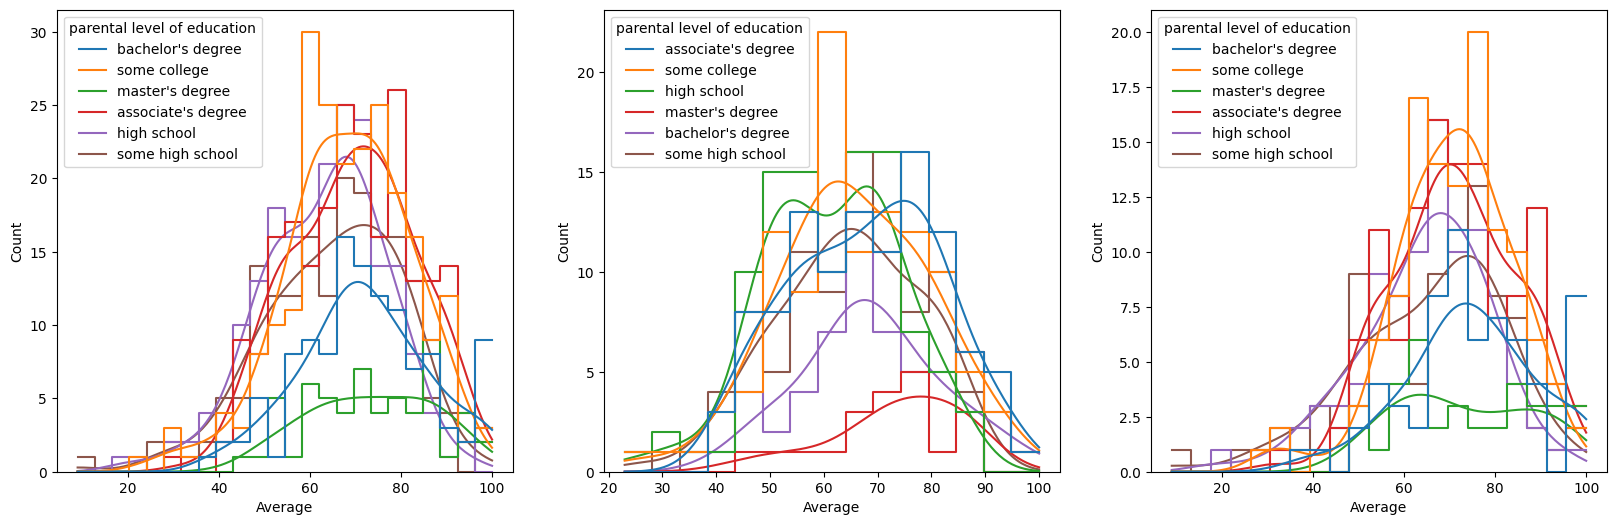

In [13]:
fig, axs = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df,x='Average',kde=True,hue='parental level of education',ax=axs[0], element='step', fill=False)

sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education', ax=axs[1], element='step', fill=False)

sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education', ax=axs[2], element='step',fill=False)


Insights

There is no relation between parents and education and students' marks.

<Axes: xlabel='Average', ylabel='Count'>

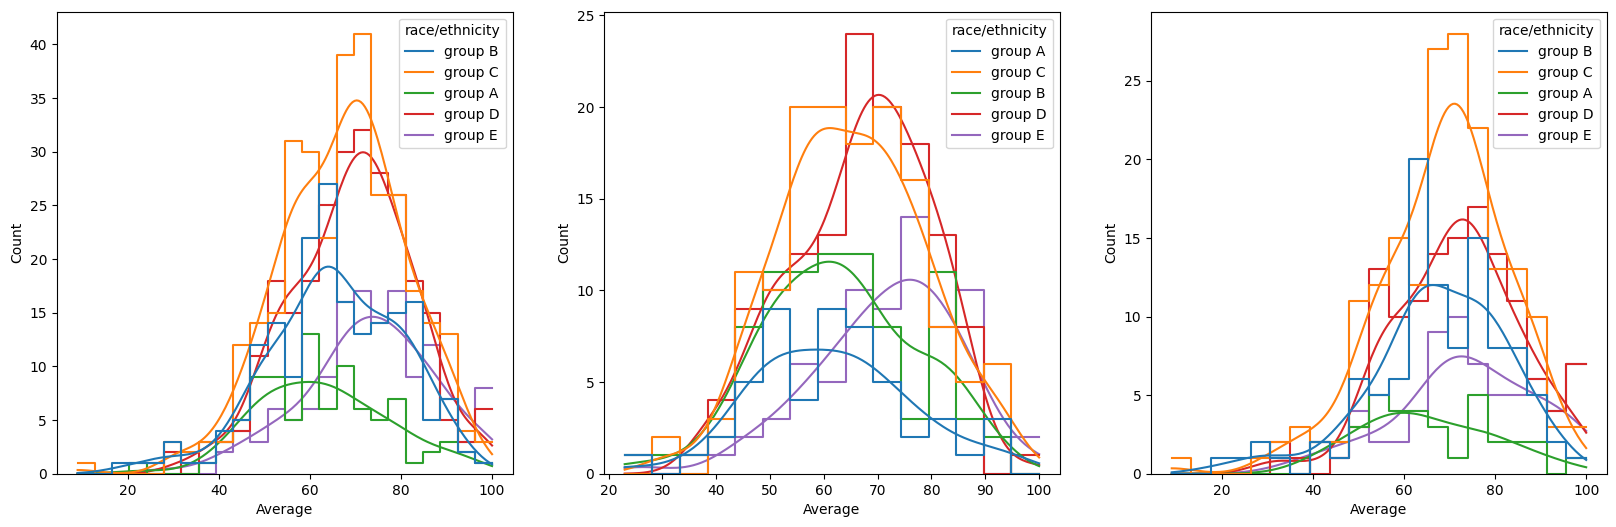

In [14]:
fig, axs = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity',ax=axs[0], element='step', fill=False)

sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity', ax=axs[1], element='step', fill=False)

sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity', ax=axs[2], element='step',fill=False)

Insights

Students of group A and group B tends to perform poorly in exam irrespective of gender.

Students of group C and group D tends to perform better in exam irrespective of gender.

<Axes: xlabel='Average', ylabel='Count'>

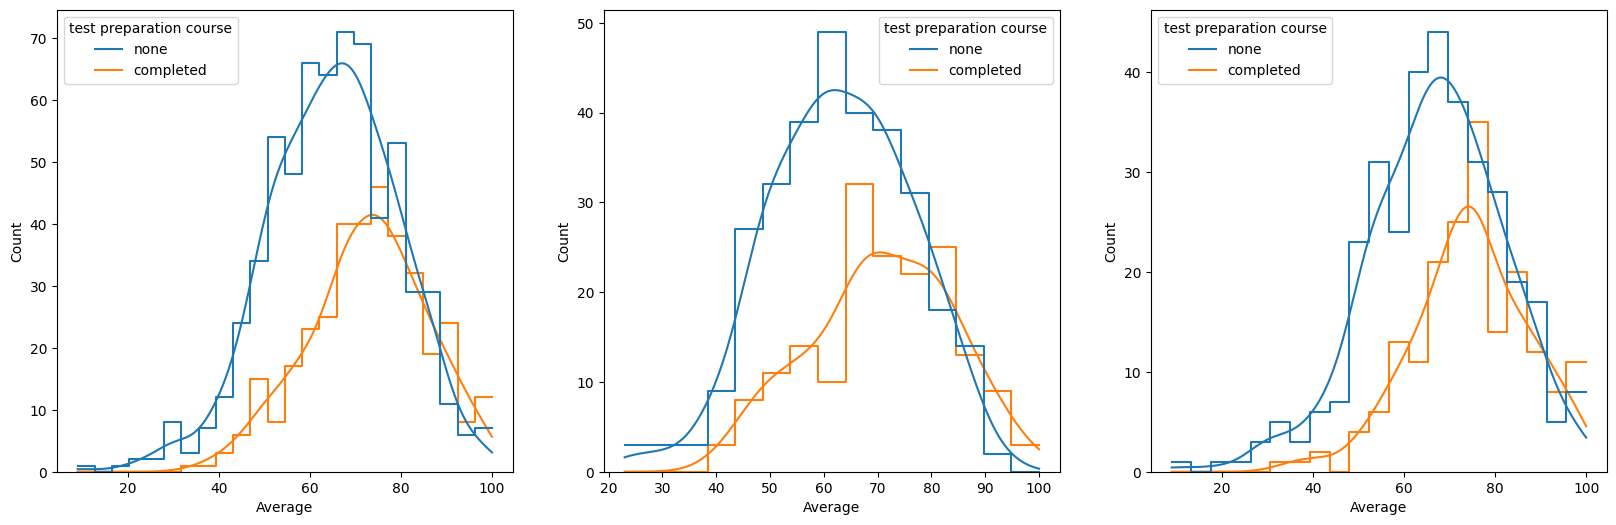

In [15]:
fig, axs = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df,x='Average',kde=True,hue='test preparation course',ax=axs[0], element='step', fill=False)

sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='test preparation course', ax=axs[1], element='step', fill=False)

sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='test preparation course', ax=axs[2], element='step',fill=False)

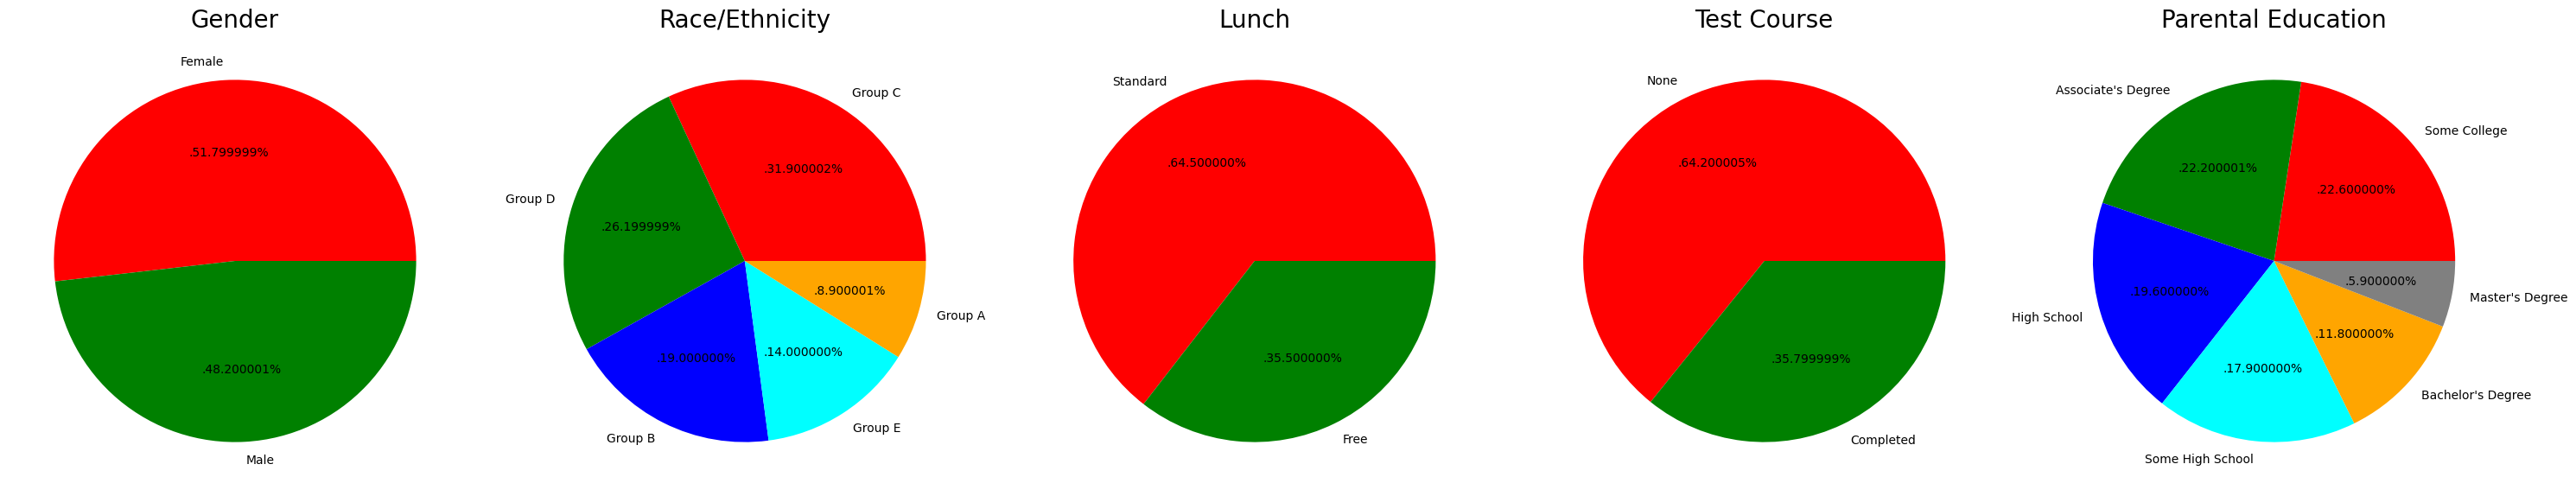

In [16]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# Final Analysis and Key Insights

Based on the exploratory data analysis of student performance, here are the key findings:

1. Gender Distribution and Performance:
   - The dataset has a relatively balanced gender distribution
   - Female students generally perform better than male students across all subjects
   - This trend is consistent in both total scores and average scores

2. Lunch Type Impact:
   - Students with standard lunch consistently show better academic performance
   - This pattern holds true regardless of gender
   - This might indicate a correlation between socioeconomic status and academic performance

3. Parental Education:
   - Surprisingly, there is no strong correlation between parents' education level and student performance
   - Students perform similarly across all parental education categories
   - This suggests that other factors might be more influential in determining academic success

4. Race/Ethnicity Analysis:
   - Groups C and D consistently show better academic performance
   - Groups A and B tend to perform below average
   - This trend is consistent across both genders
   - This might indicate potential systemic issues that need to be addressed

5. Test Preparation:
   - Students who completed the test preparation course generally performed better
   - This indicates the effectiveness of test preparation programs
   - Suggests that implementing more test preparation resources could be beneficial

6. Overall Distribution:
   - Standard lunch is more common than free lunch
   - Most students don't complete the test preparation course
   - Parental education levels are diverse, with "some college" being the most common

Recommendations:
1. Implement more comprehensive test preparation programs
2. Investigate and address the performance gap between different ethnic groups
3. Consider expanding the standard lunch program
4. Provide additional support for Groups A and B to improve their performance
5. Develop targeted interventions based on these findings to improve overall student performance